In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import seaborn as sns; sns.set()
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id='da06919089954d6395139775f24cc770',client_secret='7b718f878b094f08bf945cb9663bbbb3',redirect_uri='http://127.0.0.1:9090', scope='user-top-read',username='jwhandley'))

sp.current_user()

{'country': 'GB',
 'display_name': 'jwhandley',
 'email': 'jwhandley17@gmail.com',
 'explicit_content': {'filter_enabled': False, 'filter_locked': False},
 'external_urls': {'spotify': 'https://open.spotify.com/user/jwhandley'},
 'followers': {'href': None, 'total': 1},
 'href': 'https://api.spotify.com/v1/users/jwhandley',
 'id': 'jwhandley',
 'images': [],
 'product': 'premium',
 'type': 'user',
 'uri': 'spotify:user:jwhandley'}

In [2]:
short_term  = sp.current_user_top_tracks(limit=50,time_range='short_term')['items']
medium_term = sp.current_user_top_tracks(limit=50,time_range='medium_term')['items']
long_term   = sp.current_user_top_tracks(limit=50,time_range='long_term')['items']

top_tracks = {
    'short_term'  : [short_term[i]['id'] for i in range(50)],
    'medium_term' : [medium_term[i]['id'] for i in range(50)],
    'long_term'   : [long_term[i]['id'] for i in range(50)]
}

In [3]:
track = sp.audio_analysis(top_tracks['short_term'][2])

track.keys()

dict_keys(['meta', 'track', 'bars', 'beats', 'sections', 'segments', 'tatums'])

In [7]:
[sp.tracks(top_tracks['short_term'])['tracks'][i]['name'] for i in range(50)]

['Ordinary Superstar',
 'H.E.A.V.E.N',
 'Sweet but Psycho',
 'Kings & Queens',
 'Tattoo',
 "Who's Laughing Now",
 'Take You To Hell',
 'Born to the Night',
 "OMG What's Happening",
 'Torn',
 'Naked',
 'Belladonna',
 'Call Me Tonight',
 'No Angel',
 'Rumors',
 'Salt',
 'So Am I',
 'Bad Romance',
 'Cyber Stockholm Syndrome',
 'Take Me as I Am',
 '10-20-40',
 'Alterlife',
 'Tunnel Vision',
 'Time Out - Interlude',
 'Through the Wire - Interlude',
 'LA Hallucinations',
 'Comme Des Garçons (Like The Boys)',
 '...Baby One More Time',
 'The Gate',
 'After the Afterparty (feat. Lil Yachty)',
 'Dynasty',
 'Happy',
 'Pang',
 'XS',
 'Favourite Colour',
 'Hunter',
 'Oops!...I Did It Again',
 'Speechless',
 'Warm Blood',
 'Hey Big Eyes',
 'Love Again - Bonus Track',
 'Next Level Charli',
 'Femmebot (feat. Dorian Electra and Mykki Blanco)',
 "It's Oh So Quiet",
 'Hit Me Where It Hurts',
 'Future Nostalgia',
 'Run Away With Me',
 'Paparazzi',
 'When I Needed You',
 'Dance In The Dark']

In [4]:
columns = pd.MultiIndex.from_product([['short_term','medium_term','long_term'],['danceability','energy','loudness','acousticness','valence','tempo']],names=['time_range','feature'])
features = pd.DataFrame(columns=columns)

for time_range in ['short_term','medium_term','long_term']:
    audio_features = sp.audio_features(top_tracks[time_range])
    
    for key in ['danceability','energy','loudness','acousticness','valence','tempo']:
        features[(time_range,key)] = [audio_features[i][key] for i in range(50)]

features = features.stack(0).reset_index(1)
features.head()

features.groupby('time_range').mean()

feature,acousticness,danceability,energy,loudness,tempo,valence
time_range,,,,,,
long_term,0.128021,0.56056,0.70284,-6.47886,127.48488,0.416350
medium_term,0.144205,0.61796,0.66126,-5.55508,121.14526,0.469802
short_term,0.156776,0.59922,0.70840,-5.61024,118.03804,0.527190


Text(0.5, 1.0, 'Audio features of my top 50 Spotify tracks by time range')

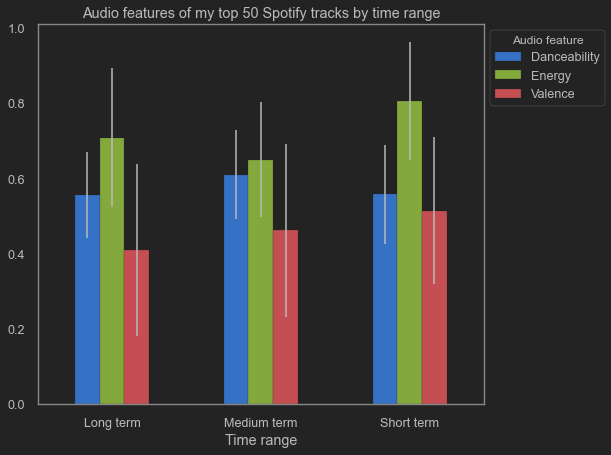

In [114]:
features.groupby('time_range').mean()[['danceability','energy','valence']].plot.bar(yerr = features.groupby('time_range').std()[['danceability','energy','valence']])
plt.xticks([0,1,2],['Long term','Medium term','Short term'],rotation=0)
plt.xlabel('Time range')
plt.legend(['Danceability','Energy','Valence'],bbox_to_anchor=(1,1),title='Audio feature')
plt.title('Audio features of my top 50 Spotify tracks by time range')

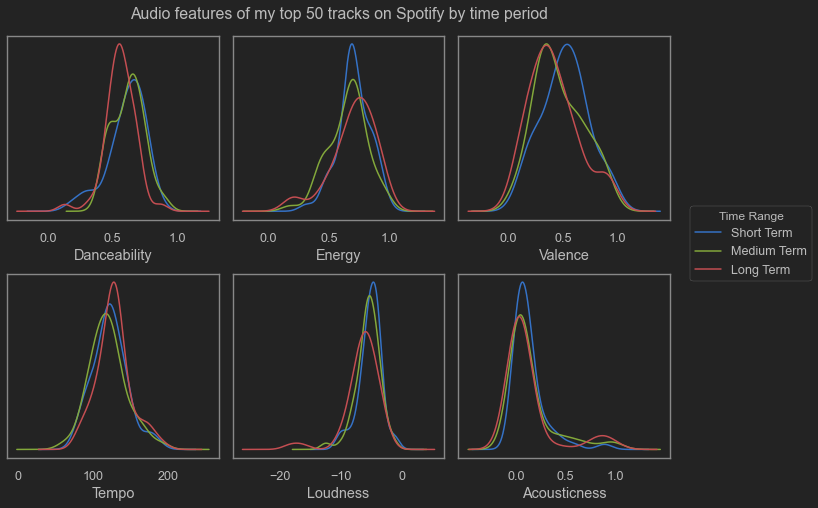

In [6]:
fig, axs = plt.subplots(nrows=2,ncols=3,figsize=(8*1.2,6*1.2))
for idx, feature in enumerate(['danceability','energy','valence','tempo','loudness','acousticness']):
    for time_range in ['short_term','medium_term','long_term']:
        features.query(f'time_range=="{time_range}"')[feature].plot.kde(label=time_range.replace('_',' ').title(),ax=axs[int(idx>2),idx % 3])
        axs[int(idx>2),idx % 3].set_ylabel('')
        axs[int(idx>2),idx % 3].set_yticks([])
        axs[int(idx>2),idx % 3].set_xlabel(feature.title())
        if feature in ['danceability','energy','valence','acousticness']:
            axs[int(idx>2),idx % 3].set_xticks([0,0.5,1])

plt.tight_layout()
plt.legend(bbox_to_anchor=(1.7,1.4),title='Time Range')
plt.suptitle('Audio features of my top 50 tracks on Spotify by time period')
plt.subplots_adjust(top=0.925)